Dog Vs Cat Classification

In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [12]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 24.4MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]


In [13]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

Generators in Keras -> Useful to handle large amount of datasets. As it load the Data on RAM batch wise.

In [15]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode='int', # It will asign 0-> to Dog and 1 to-> Cat
    batch_size=32,
    image_size=(256,256)  # We are doing so inordere to make the image of all image to same level
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode='int', # It will asign 0-> to Dog and 1 to-> Cat
    batch_size=32,
    image_size=(256,256)  # We are doing so inordere to make the image of all image to same level
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Here the image is stored in the numpy array 256,256.
But we have to normalize and convert it into the range of
0 to 1

In [16]:
#Normalization
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [25]:
#CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                      

In [27]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [28]:
history = model.fit(train_ds,epochs=10,validation_data=(validation_ds))

Epoch 1/10
625/625 [==============================] - 58s 87ms/step - loss: 0.8108 - accuracy: 0.6040 - val_loss: 0.6238 - val_accuracy: 0.6346
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.5548 - accuracy: 0.7182 - val_loss: 0.6736 - val_accuracy: 0.6458
Epoch 3/10
625/625 [==============================] - 51s 80ms/step - loss: 0.4737 - accuracy: 0.7740 - val_loss: 0.4861 - val_accuracy: 0.7656
Epoch 4/10
625/625 [==============================] - 51s 80ms/step - loss: 0.4057 - accuracy: 0.8123 - val_loss: 0.4254 - val_accuracy: 0.8110
Epoch 5/10
625/625 [==============================] - 53s 85ms/step - loss: 0.3572 - accuracy: 0.8424 - val_loss: 0.4725 - val_accuracy: 0.7876
Epoch 6/10
625/625 [==============================] - 51s 80ms/step - loss: 0.2938 - accuracy: 0.8737 - val_loss: 0.6497 - val_accuracy: 0.7542
Epoch 7/10
625/625 [==============================] - 57s 91ms/step - loss: 0.2310 - accuracy: 0.9037 - val_loss: 0.5244 - val_accuracy:

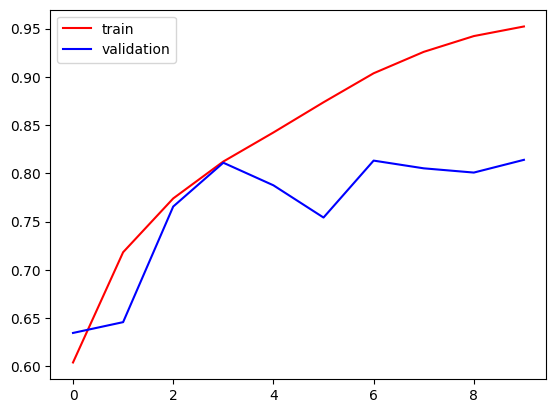

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

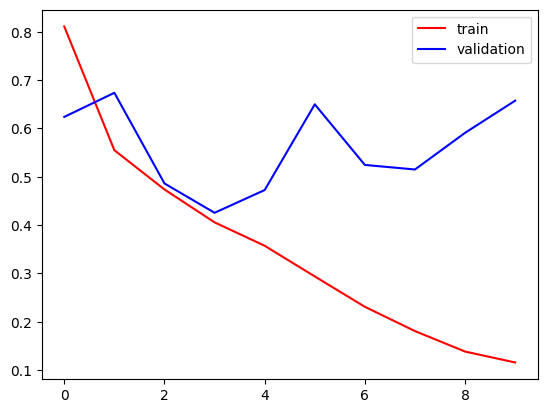

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Here we can see clearly that Model is overfitting on Validation data

In [44]:
import cv2

In [56]:
test_img = cv2.imread('/content/dog.jpg')

In [47]:
from google.colab.patches import cv2_imshow

In [57]:
image_float = np.float32(test_img)/255

In [58]:
plt.imshow(cv2.cvtColor(image_float, cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)
